In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Unpack lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
lat_lngs = zip(lats, lngs)
lat_lngs

# One can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure to unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(64.50309435585368, 169.38401770913669), (-39.875551289628824, 19.71151888203238), (28.409222071879967, -163.75288089808382), (-76.46730187484883, 39.66658944206279), (56.92540200399765, -6.666202146693024), (-49.311174104394404, -27.025899924881116), (24.25756906958796, -148.03330921573183), (12.14957934999535, -83.06292107543979), (-20.8071313311021, 102.28584004519024), (-35.36329837302918, 64.05081133787334), (-81.62896119033209, -135.49483745250458), (60.458465671658075, 12.705574135075466), (-40.73448168246197, -78.53474279939061), (22.35094665449465, 65.91557549706985), (79.88225275177382, 12.134399427550619), (-66.13558482308346, -150.67498189797257), (-56.925872764474036, -98.52198200419048), (36.68602865781547, 49.71451377643044), (26.790276754545985, -167.00935969884065), (-60.13193589841009, -71.58475658103907), (33.00684256236276, 114.76484341205759), (57.442091466889764, 24.738693262026658), (40.256370282859336, 153.86814524503353), (-69.59095650267473, 71.9415943757576)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [5]:
# Build the basic URL for the OpenWeatherMap with my weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f2c3e9a412df968ee9375917061f95e


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [8]:
cities

['kamenskoye',
 'bredasdorp',
 'kapaa',
 'port alfred',
 'tobermory',
 'cidreira',
 'hilo',
 'corn island',
 'carnarvon',
 'souillac',
 'rikitea',
 'kirkenaer',
 'ancud',
 'keti bandar',
 'barentsburg',
 'mataura',
 'punta arenas',
 'rudbar',
 'ushuaia',
 'huangzhai',
 'limbazi',
 'sentyabrskiy',
 'saint-philippe',
 'caravelas',
 'butaritari',
 'flinders',
 'stephenville',
 'cradock',
 'kaitangata',
 'georgetown',
 'puerto ayora',
 'samusu',
 'ozgon',
 'jijiga',
 'barrow',
 'sabang',
 'akyab',
 'te anau',
 'hithadhoo',
 'hasaki',
 'albany',
 'the valley',
 'khatanga',
 'patacamaya',
 'castro',
 'ilulissat',
 'rawson',
 'port lincoln',
 'dingle',
 'upice',
 'mjolby',
 'provideniya',
 'kang',
 'leningradskiy',
 'hobart',
 'emmett',
 'bluff',
 'zhigansk',
 'gogrial',
 'broome',
 'vysokogornyy',
 'uruzgan',
 'olafsvik',
 'hanko',
 'berlevag',
 'chacabuco',
 'airai',
 'kaseda',
 'mimoso do sul',
 'busselton',
 'atuona',
 'papasquiaro',
 'coihaique',
 'yambio',
 'gornopravdinsk',
 'new norfo

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 30 of Set 25 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 25 | bredasdorp
Processing Record 32 of Set 25 | kapaa
Processing Record 33 of Set 25 | port alfred
Processing Record 34 of Set 25 | tobermory
Processing Record 35 of Set 25 | cidreira
Processing Record 36 of Set 25 | hilo
Processing Record 37 of Set 25 | corn island
Processing Record 38 of Set 25 | carnarvon
Processing Record 39 of Set 25 | souillac
Processing Record 40 of Set 25 | rikitea
Processing Record 41 of Set 25 | kirkenaer
Processing Record 42 of Set 25 | ancud
Processing Record 43 of Set 25 | keti bandar
Processing Record 44 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 25 | mataura
Processing Record 46 of Set 25 | punta arenas
Processing Record 47 of Set 25 | rudbar
Processing Record 48 of Set 25 | ushuaia
Processing Record 49 of Set 25 | huangzhai
Processing Record 50 of Set 25 | limbazi
Processing Record 51 of Set 25 | sentyabrskiy
City not

City not found. Skipping...
Processing Record 31 of Set 28 | azul
Processing Record 32 of Set 28 | douglas
Processing Record 33 of Set 28 | biharamulo
Processing Record 34 of Set 28 | faya
Processing Record 35 of Set 28 | vila velha
Processing Record 36 of Set 28 | santiago del estero
Processing Record 37 of Set 28 | deputatskiy
Processing Record 38 of Set 28 | nantucket
Processing Record 39 of Set 28 | sigerfjord
City not found. Skipping...
Processing Record 40 of Set 28 | mount isa
Processing Record 41 of Set 28 | klaksvik
Processing Record 42 of Set 28 | sao joao da barra
Processing Record 43 of Set 28 | kemijarvi
Processing Record 44 of Set 28 | mar del plata
Processing Record 45 of Set 28 | puerto del rosario
Processing Record 46 of Set 28 | damghan
Processing Record 47 of Set 28 | tuktoyaktuk
Processing Record 48 of Set 28 | sindor
Processing Record 49 of Set 28 | elizabeth city
Processing Record 50 of Set 28 | coron
Processing Record 1 of Set 29 | garissa
Processing Record 2 of 

Processing Record 17 of Set 32 | neyshabur
Processing Record 18 of Set 32 | caapora
Processing Record 19 of Set 32 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 32 | luderitz
Processing Record 21 of Set 32 | abilene
Processing Record 22 of Set 32 | srednekolymsk
Processing Record 23 of Set 32 | grand river south east
City not found. Skipping...
Processing Record 24 of Set 32 | umzimvubu
City not found. Skipping...
Processing Record 25 of Set 32 | buon me thuot
City not found. Skipping...
Processing Record 26 of Set 32 | nadym
Processing Record 27 of Set 32 | avera
Processing Record 28 of Set 32 | talnakh
Processing Record 29 of Set 32 | yumen
Processing Record 30 of Set 32 | turukhansk
Processing Record 31 of Set 32 | ulaangom
Processing Record 32 of Set 32 | evensk
Processing Record 33 of Set 32 | garmsar
Processing Record 34 of Set 32 | samarai
Processing Record 35 of Set 32 | los llanos de aridane
Processing Record 36 of Set 32 | lazarev
Processing Record 37

Processing Record 50 of Set 35 | oga
Processing Record 1 of Set 36 | adrian
Processing Record 2 of Set 36 | vlakhokerasea
City not found. Skipping...
Processing Record 3 of Set 36 | lavrentiya
Processing Record 4 of Set 36 | gueret
Processing Record 5 of Set 36 | ordzhonikidze
Processing Record 6 of Set 36 | kampot
Processing Record 7 of Set 36 | orlik
Processing Record 8 of Set 36 | high level
Processing Record 9 of Set 36 | da lat
Processing Record 10 of Set 36 | port moresby
Processing Record 11 of Set 36 | sovetskiy
Processing Record 12 of Set 36 | pampa
Processing Record 13 of Set 36 | honiara
Processing Record 14 of Set 36 | gazanjyk
Processing Record 15 of Set 36 | minab
Processing Record 16 of Set 36 | new baltimore
Processing Record 17 of Set 36 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 36 | calama
Processing Record 19 of Set 36 | panguna
Processing Record 20 of Set 36 | baie-comeau
Processing Record 21 of Set 36 | seoul
Processing Record 22 of Se

In [13]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

567

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,64.40,72,0,9.22,ZA,2021-01-16 00:49:40
1,Kapaa,22.0752,-159.3190,78.80,78,75,10.36,US,2021-01-16 00:49:31
2,Port Alfred,-33.5906,26.8910,66.99,86,0,5.99,ZA,2021-01-16 00:49:40
3,Tobermory,45.2501,-81.6665,39.20,81,100,14.97,CA,2021-01-16 00:49:40
4,Cidreira,-30.1811,-50.2056,77.11,83,98,21.45,BR,2021-01-16 00:48:49
5,Hilo,19.7297,-155.0900,82.40,57,1,11.50,US,2021-01-16 00:45:02
6,Corn Island,12.1694,-83.0418,79.63,77,100,13.44,NI,2021-01-16 00:49:40
7,Carnarvon,-24.8667,113.6333,80.60,100,0,11.50,AU,2021-01-16 00:47:55
8,Souillac,-20.5167,57.5167,78.80,94,40,4.61,MU,2021-01-16 00:49:40
9,Rikitea,-23.1203,-134.9692,79.68,66,0,8.10,PF,2021-01-16 00:49:40


In [17]:
# Reorder the Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-01-16 00:49:40,-34.5322,20.0403,64.40,72,0,9.22
1,Kapaa,US,2021-01-16 00:49:31,22.0752,-159.3190,78.80,78,75,10.36
2,Port Alfred,ZA,2021-01-16 00:49:40,-33.5906,26.8910,66.99,86,0,5.99
3,Tobermory,CA,2021-01-16 00:49:40,45.2501,-81.6665,39.20,81,100,14.97
4,Cidreira,BR,2021-01-16 00:48:49,-30.1811,-50.2056,77.11,83,98,21.45
5,Hilo,US,2021-01-16 00:45:02,19.7297,-155.0900,82.40,57,1,11.50
6,Corn Island,NI,2021-01-16 00:49:40,12.1694,-83.0418,79.63,77,100,13.44
7,Carnarvon,AU,2021-01-16 00:47:55,-24.8667,113.6333,80.60,100,0,11.50
8,Souillac,MU,2021-01-16 00:49:40,-20.5167,57.5167,78.80,94,40,4.61
9,Rikitea,PF,2021-01-16 00:49:40,-23.1203,-134.9692,79.68,66,0,8.10


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Weather Data

## Latitude vs. Temperature

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610835429.678567

In [21]:
# Use string format method to reformat the datetime stamp.
today = time.strftime("%x")
today

'01/16/21'

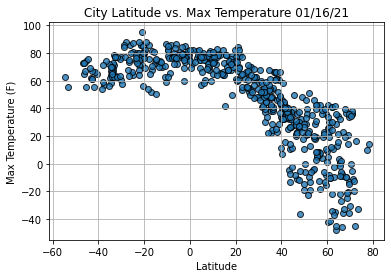

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

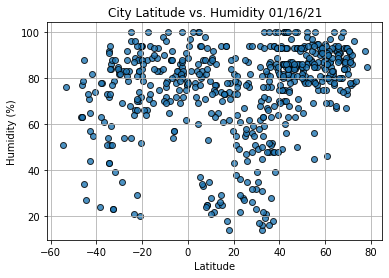

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

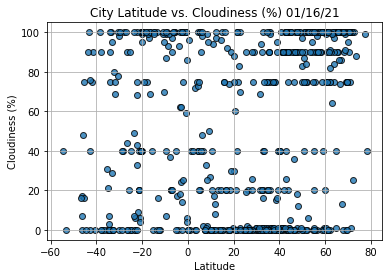

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

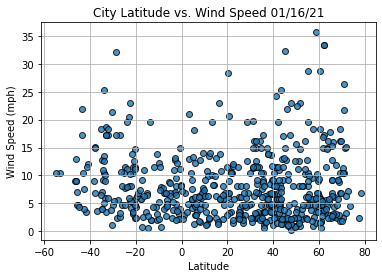

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()